# Library Definition and Initialization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/kaggle/input/dataset-containing-antenna-parameters/dataset_antenna.csv')
df.head()

,Freq(GHz),length of patch in mm,width of patch in mm,Slot length in mm,slot width in mm,s11(dB)
0,1.500000,33.0,33,0.0,0,-4.927274
1,1.551724,33.0,33,0.0,0,-5.077877
2,1.603448,33.0,33,0.0,0,-5.183708
3,1.655172,33.0,33,0.0,0,-5.215997
4,1.706897,33.0,33,0.0,0,-5.120009


# Exploratory Data Analysis

In [3]:
df.isna().sum()

Freq(GHz)                0
length of patch in mm    0
width of patch in mm     0
Slot length in mm        0
slot width in mm         0
s11(dB)                  0
dtype: int64

In [4]:
df['Freq(GHz)'].value_counts()

Freq(GHz)
1.50    8
3.00    8
1.88    6
1.89    6
2.18    6
       ..
1.21    1
1.22    1
1.23    1
1.24    1
1.04    1
Name: count, Length: 279, dtype: int64

<Axes: ylabel='Freq(GHz)'>

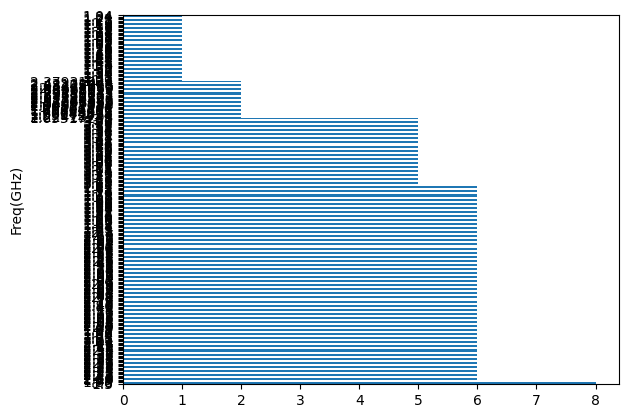

In [5]:
df['Freq(GHz)'].value_counts().plot(kind = 'barh')

In [6]:
df.columns

Index(['Freq(GHz)', 'length of patch in mm', 'width of patch in mm',
       'Slot length in mm', 'slot width in mm', 's11(dB)'],
      dtype='object')

In [7]:
df.shape

(1266, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Freq(GHz)              1266 non-null   float64
 1   length of patch in mm  1266 non-null   float64
 2   width of patch in mm   1266 non-null   int64  
 3   Slot length in mm      1266 non-null   float64
 4   slot width in mm       1266 non-null   int64  
 5   s11(dB)                1266 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 59.5 KB


In [9]:
df.describe()

,Freq(GHz),length of patch in mm,width of patch in mm,Slot length in mm,slot width in mm,s11(dB)
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,2.408768,39.636730,50.440758,19.399289,26.857820,-1.718475
std,0.604011,20.702096,34.846882,11.019903,16.369894,3.042243
min,1.000000,29.400000,26.000000,0.000000,0.000000,-34.533968
25%,1.910000,29.400000,38.000000,14.000000,24.000000,-1.387842
50%,2.410000,29.400000,38.000000,19.750000,24.000000,-0.744253
75%,2.900000,35.500000,38.000000,20.000000,28.000000,-0.596102
max,3.500000,87.000000,130.000000,85.000000,115.000000,-0.159236


In [10]:
df.duplicated().sum()

0

In [11]:
df.columns = df.columns.str.lower()
df.head(3)

,freq(ghz),length of patch in mm,width of patch in mm,slot length in mm,slot width in mm,s11(db)
0,1.500000,33.0,33,0.0,0,-4.927274
1,1.551724,33.0,33,0.0,0,-5.077877
2,1.603448,33.0,33,0.0,0,-5.183708


In [12]:
df.columns

Index(['freq(ghz)', 'length of patch in mm', 'width of patch in mm',
       'slot length in mm', 'slot width in mm', 's11(db)'],
      dtype='object')

# Visualization

<Axes: xlabel='width of patch in mm', ylabel='s11(db)'>

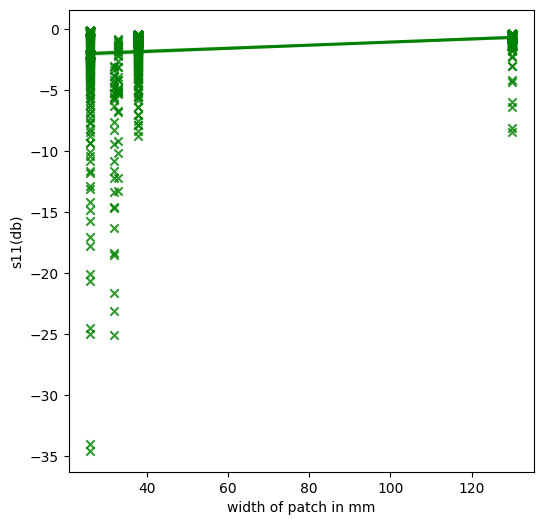

In [13]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(6,6))
sns.regplot(data = df,
           x = df['width of patch in mm'],
           y = df['s11(db)'],
           color = 'g', marker = 'x')

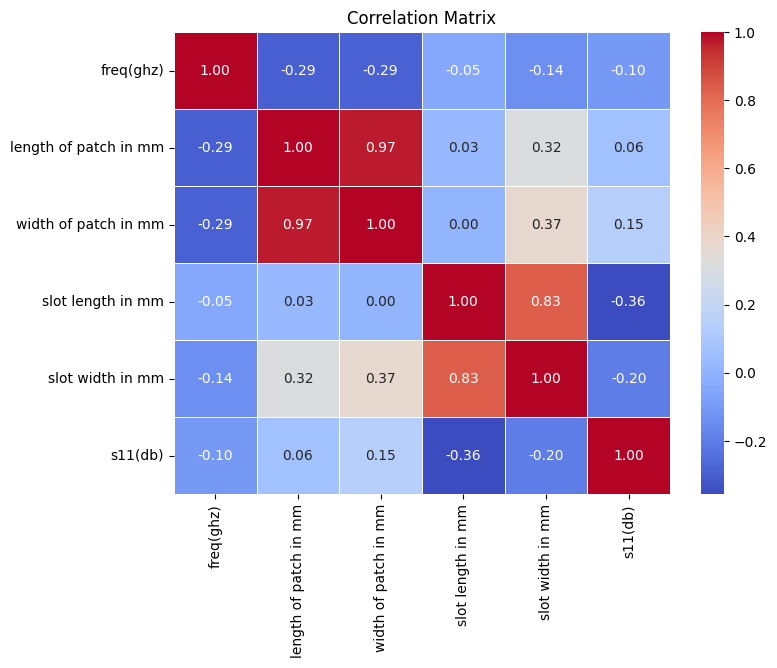

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

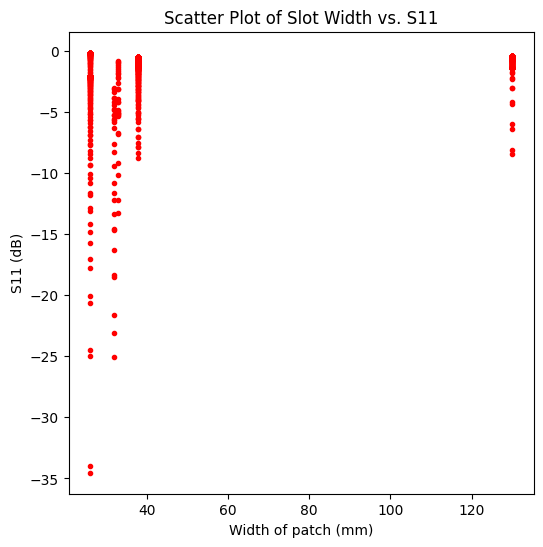

In [15]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(6,6))
plt.scatter(df['width of patch in mm'], df['s11(db)'], color='r', marker='.')

plt.xlabel("Width of patch (mm)")
plt.ylabel("S11 (dB)")
plt.title("Scatter Plot of Slot Width vs. S11")

plt.show()


# Data Split & Preprocessing

In [16]:
x = df.drop(['s11(db)'], axis=1)
y = df['s11(db)']

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)
X = scaled_features

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Random Forest MAE:', mae)
print('Random Forest MSE:', mse)
print('Random Forest R²:', r2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the MAPE value
print("Mean Absolute Percentage Error (MAPE):", mape)

Random Forest MAE: 0.12467089364519644
Random Forest MSE: 0.21773809408092207
Random Forest R²: 0.9750832550515379
Mean Absolute Percentage Error (MAPE): 4.3903142394896495


In [21]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define base models
base_models = [
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print('Stacking Model MAE:', mae)
print('Stacking Model MSE:', mse)
print('Stacking Model RMSE:', rmse)
print('Stacking Model R²:', r2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the MAPE value
print("Mean Absolute Percentage Error (MAPE):", mape)

Stacking Model MAE: 0.17079276876260707
Stacking Model MSE: 0.18126808424738056
Stacking Model RMSE: 0.42575589748984166
Stacking Model R²: 0.9792566815579375
Mean Absolute Percentage Error (MAPE): 12.391623727434869


# HyperTuned Models

In [22]:
import joblib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Random Forest Model with Hyperparameter Tuning using RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the results
print("Random Forest MAE:", mae)
print("Random Forest MSE:", mse)
print("Random Forest R²:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Cross-validation to check the generalization of the model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random Forest MAE: 0.06936465323917401
Random Forest MSE: 0.037493398834243616
Random Forest R²: 0.9957094625083995
Mean Absolute Percentage Error (MAPE): 2.6113685611485353
Cross-validation scores: [0.98097259 0.98569671 0.97222584 0.94877505 0.95235646]
Average cross-validation score: 0.9680053292301514


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Decision Tree Model with Hyperparameter Tuning using RandomizedSearchCV
dt_model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid to search through
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_dt_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the results
print("Decision Tree MAE:", mae)
print("Decision Tree MSE:", mse)
print("Decision Tree R²:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Cross-validation to check the generalization of the model
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Decision Tree MAE: 0.14526207350050105
Decision Tree MSE: 0.24998220983481703
Decision Tree R²: 0.9713934165245693
Mean Absolute Percentage Error (MAPE): 3.4045727388032363
Cross-validation scores: [0.96723594 0.98306336 0.98452493 0.87751325 0.88991163]
Average cross-validation score: 0.9404498239217138


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Define base models with hyperparameter tuning
base_models = [
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
]

# Hyperparameter tuning for Random Forest using RandomizedSearchCV
rf_param_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=rf_param_grid, 
                               n_iter=50, cv=3, n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# Hyperparameter tuning for Gradient Boosting using RandomizedSearchCV
gb_param_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'subsample': [0.8, 0.9, 1.0]
}

gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions=gb_param_grid, 
                               n_iter=50, cv=3, n_jobs=-1, random_state=42)
gb_search.fit(X_train, y_train)
best_gb = gb_search.best_estimator_

# Define the meta-model (you can use Ridge regression for better regularization)
meta_model = Ridge(alpha=1.0)

# Create the stacking model
stacking_model = StackingRegressor(estimators=[('ridge', Ridge(alpha=1.0)), 
                                              ('rf', best_rf), 
                                              ('gb', best_gb)], 
                                   final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print('Stacking Model MAE:', mae)
print('Stacking Model MSE:', mse)
print('Stacking Model RMSE:', rmse)
print('Stacking Model R²:', r2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Cross-validation to check the generalization of the model
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


Stacking Model MAE: 0.12991089835848596
Stacking Model MSE: 0.08799774635653347
Stacking Model RMSE: 0.29664414094421865
Stacking Model R²: 0.9899300239066559
Mean Absolute Percentage Error (MAPE): 9.79154592923741
Cross-validation scores: [0.97035638 0.9748358  0.94690323 0.92897541 0.9348472 ]
Average cross-validation score: 0.9511836048197171
